In [26]:
# OPTIMIZATION THEORY - HOMEWORK PROBLEM SET #2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linalg import Vector, Matrix
from steepest_descent import sda

In [2]:
Q = Matrix([
	[10, -18, 2],
	[-18, 40, -1],
	[2, -1, 3]
])
c = Vector([12, -47, -8])
f = lambda x: 0.5 * x.T @ Q @ x + c @ x
gradf = lambda x: Q @ x + c

sda: status=0, x0=[0 0 0], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=102
sda: status=0, x0=[15.09  7.66 -6.56], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=313
sda: status=0, x0=[11.77  6.42 -4.28], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=83
sda: status=0, x0=[4.46 2.25 1.85], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=52


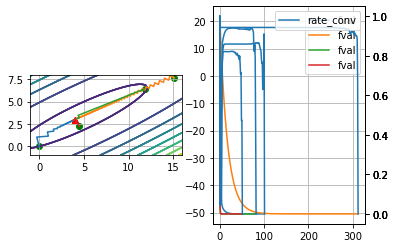

In [4]:
fig, ax = plt.subplots(2,1)
for x0 in [
	Vector([0, 0, 0]),
	Vector([15.09, 7.66, -6.56]),
	Vector([11.77, 6.42, -4.28]),
	Vector([4.46, 2.25, 1.85])
]:
	xopt, fval_opt, status, history = sda(f, gradf, x0, epsilon=1e-3, max_num_iter=1000)

	print(f"sda: {status=}, x0={np.round(x0,2)}, xopt={np.round(xopt,2)}, fval_opt={np.round(fval_opt,2)}, num_iter={len(history['x'])}")

	ax[0].set_aspect(1.0)
	ax[0].grid(True)
	x = np.linspace(-1,16,50)
	y = np.linspace(-1,8,40)
	[xx, yy] = np.meshgrid(x, y)
	zz = np.zeros_like(xx)
	for i in range(len(x)):
		for j in range(len(y)):
			zz[j,i] = f(Vector((x[i],y[j],0)))
	ax[0].contour(xx, yy, zz)
	ax[0].plot(history['x'][:,0], history['x'][:,1])
	ax[0].scatter(history['x'][0,0], history['x'][0,1], color='green')
	ax[0].scatter(history['x'][-1,0], history['x'][-1,1], marker='^', color='red')
	ax[1].grid(True)
	twin = ax[1].twinx()
	ax[1].plot(history['fval'], label='fval')
	twin.plot(history['rate_conv'], label='rate_conv')
ax[1].legend(loc='best')
twin.legend(loc='best')
plt.show()